# 第5章: 係り受け解析

In [1]:
!wget https://nlp100.github.io/data/neko.txt

Will not apply HSTS. The HSTS database must be a regular and non-world-writable file.
ERROR: could not open HSTS store at '/home/altair626/.wget-hsts'. HSTS will be disabled.
--2020-04-30 21:32:29--  https://nlp100.github.io/data/neko.txt
Resolving nlp100.github.io (nlp100.github.io)... 185.199.111.153, 185.199.108.153, 185.199.109.153, ...
Connecting to nlp100.github.io (nlp100.github.io)|185.199.111.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 965825 (943K) [text/plain]
Saving to: ‘neko.txt.1’

neko.txt.1          100%[===================>] 943.19K  --.-KB/s    in 0.04s   

2020-04-30 21:32:29 (21.0 MB/s) - ‘neko.txt.1’ saved [965825/965825]



In [2]:
!cabocha -f1 <neko.txt >neko.txt.cabocha

## 40. 係り受け解析結果の読み込み（形態素）
形態素を表すクラスMorphを実装せよ．このクラスは表層形（surface），基本形（base），品詞（pos），品詞細分類1（pos1）をメンバ変数に持つこととする．さらに，CaboChaの解析結果（neko.txt.cabocha）を読み込み，各文をMorphオブジェクトのリストとして表現し，3文目の形態素列を表示せよ．

In [3]:
class Morph:
    def __init__(self,surf_line,base=None,pos=None,pos1=None):
        if base is not None:
            self.surface=surf_line
            self.base=base
            self.pos=pos
            self.pos1=pos1
        else:
            self.surface = surf_line.split("\t")[0]
            self.base = surf_line.split("\t")[1].split(",")[6]
            self.pos = surf_line.split("\t")[1].split(",")[0]
            self.pos1 = surf_line.split("\t")[1].split(",")[1]
    def print_morph(self):
        print("{} {} {} {}".format(self.surface,self.base,self.pos,self.pos1))

In [4]:
def make_novellist():
    novel_list = []
    with open("./neko.txt.cabocha", "r") as intxt:
        fulltxt = intxt.read()
        for sentence in fulltxt.split("EOS"):
            if sentence != "\n":
                sentence_list = []
                for morph in sentence.split("\n"):
                    if morph!="" and morph[0]!="*":
                        sentence_list.append(Morph(morph))
                novel_list.append(sentence_list)
    return novel_list

In [5]:
nl = make_novellist()
for ml in nl[2]:
    ml.print_morph()

名前 名前 名詞 一般
は は 助詞 係助詞
まだ まだ 副詞 助詞類接続
無い 無い 形容詞 自立
。 。 記号 句点


## 41. 係り受け解析結果の読み込み（文節・係り受け）
40に加えて，文節を表すクラスChunkを実装せよ．このクラスは形態素（Morphオブジェクト）のリスト（morphs），係り先文節インデックス番号（dst），係り元文節インデックス番号のリスト（srcs）をメンバ変数に持つこととする．さらに，入力テキストのCaboChaの解析結果を読み込み，１文をChunkオブジェクトのリストとして表現し，8文目の文節の文字列と係り先を表示せよ．第5章の残りの問題では，ここで作ったプログラムを活用せよ．

In [6]:
class Chunk:
    def __init__(self, line=None):
        if line is None:
            self.morphs=[]
            self.dst=-1
            self.srcs=[]
        else:
            self.morphs = []
            self.dst = int(line.split(" ")[1][:-1])
            self.srcs = []
    def add_morph(self,morph):
        self.morphs.append(morph)
    def add_dst(self,dst):
        self.dst=dst
    def add_src(self,src):
        self.srcs.append(src)
    def print_chunk(self):
        print("Chunk : \n\tmorphs : ")
        for morph in self.morphs:
            print("\t\t",end="")
            morph.print_morph()
        print("\tdst : {}".format(self.dst))
        print("\tsrcs : { ",end="")
        for src in self.srcs:
            print(str(src)+" ",end="")
        print("}")
    def chunk_string(self):
        return "".join([morph.surface for morph in self.morphs])
    def chunk_string_without_sign(self):
        return "".join([morph.surface if morph.pos!="記号" else "" for morph in self.morphs])
    def print_chunk_string(self):
        print(self.chunk_string())
    def include_verb(self):
        for morph in self.morphs:
            if morph.pos=="動詞":
                return True
        return False
    def include_noun(self):
        for morph in self.morphs:
            if morph.pos=="名詞":
                return True
        return False
    def get_first_verb(self):
        for morph in self.morphs:
            if morph.pos=="動詞":
                return morph.base
        return ""
    def get_last_pparticle(self):
        for morph in self.morphs[::-1]:
            if morph.pos=="助詞":
                return morph.base
        return ""

In [7]:
def make_novellist():
    novel_list = []
    with open("../data/neko.txt.cabocha", "r") as intxt:
        fulltxt = intxt.read()
        for sentence in fulltxt.split("EOS"):
            if sentence != "\n":
                sentence_list = []
                chunks = sentence.split("* ")
                for chunk in chunks[1:]:
                    cs = chunk.split("\n")
                    c = Chunk(cs[0])
                    for morph in cs[1:-1]:
                        c.add_morph(Morph(morph))
                    sentence_list.append(c)
                
                for i,chunk in enumerate(sentence_list):
                    if chunk.dst != -1:
                        sentence_list[chunk.dst].add_src(i)
                novel_list.append(sentence_list)
    return novel_list

In [8]:
nl = make_novellist()
for cl in nl[7]:
    cl.print_chunk()
    cl.print_chunk_string()

Chunk : 
	morphs : 
		この この 連体詞 *
	dst : 1
	srcs : { }
この
Chunk : 
	morphs : 
		書生 書生 名詞 一般
		という という 助詞 格助詞
		の の 名詞 非自立
		は は 助詞 係助詞
	dst : 7
	srcs : { 0 }
書生というのは
Chunk : 
	morphs : 
		時々 時々 副詞 一般
	dst : 4
	srcs : { }
時々
Chunk : 
	morphs : 
		我々 我々 名詞 代名詞
		を を 助詞 格助詞
	dst : 4
	srcs : { }
我々を
Chunk : 
	morphs : 
		捕え 捕える 動詞 自立
		て て 助詞 接続助詞
	dst : 5
	srcs : { 2 3 }
捕えて
Chunk : 
	morphs : 
		煮 煮る 動詞 自立
		て て 助詞 接続助詞
	dst : 6
	srcs : { 4 }
煮て
Chunk : 
	morphs : 
		食う 食う 動詞 自立
		という という 助詞 格助詞
	dst : 7
	srcs : { 5 }
食うという
Chunk : 
	morphs : 
		話 話 名詞 サ変接続
		で だ 助動詞 *
		ある ある 助動詞 *
		。 。 記号 句点
	dst : -1
	srcs : { 1 6 }
話である。


## 42. 係り元と係り先の文節の表示
係り元の文節と係り先の文節のテキストをタブ区切り形式ですべて抽出せよ．ただし，句読点などの記号は出力しないようにせよ．

In [9]:
Dependencies = []

for sl in nl:
    for chunk in sl:
        if chunk.dst != -1 and chunk.chunk_string_without_sign()!="" and sl[chunk.dst].chunk_string_without_sign()!="":
            Dependencies.append((chunk, sl[chunk.dst]))
    
for dep in Dependencies[:20]:
    print(dep[0].chunk_string_without_sign()+"\t"+dep[1].chunk_string_without_sign())

吾輩は	猫である
名前は	無い
まだ	無い
どこで	生れたか
生れたか	つかぬ
とんと	つかぬ
見当が	つかぬ
何でも	薄暗い
薄暗い	所で
じめじめした	所で
所で	泣いて
ニャーニャー	泣いて
泣いて	記憶している
いた事だけは	記憶している
吾輩は	見た
ここで	始めて
始めて	人間という
人間という	ものを
ものを	見た
しかも	種族であったそうだ


## 43. 名詞を含む文節が動詞を含む文節に係るものを抽出
名詞を含む文節が，動詞を含む文節に係るとき，これらをタブ区切り形式で抽出せよ．ただし，句読点などの記号は出力しないようにせよ．

In [10]:
Dependencies_nv = []

for sl in nl:
    for chunk in sl:
        if chunk.dst != -1 and chunk.include_noun() and sl[chunk.dst].include_verb():
            Dependencies_nv.append((chunk, sl[chunk.dst]))
    
for dep in Dependencies_nv[:20]:
    print(dep[0].chunk_string_without_sign()+"\t"+dep[1].chunk_string_without_sign())

どこで	生れたか
見当が	つかぬ
所で	泣いて
ニャーニャー	泣いて
いた事だけは	記憶している
吾輩は	見た
ここで	始めて
ものを	見た
あとで	聞くと
我々を	捕えて
掌に	載せられて
スーと	持ち上げられた
時	フワフワした
感じが	あったばかりである
上で	落ちついて
顔を	見たのが
ものの	見始であろう
ものだと	思った
感じが	残っている
今でも	残っている


## 44. 係り受け木の可視化
与えられた文の係り受け木を有向グラフとして可視化せよ．可視化には，係り受け木をDOT言語に変換し，Graphvizを用いるとよい．また，Pythonから有向グラフを直接的に可視化するには，pydotを使うとよい．

In [11]:
import pydot
from PIL import Image

[('どこで', '生れたか'), ('生れたか', 'つかぬ'), ('とんと', 'つかぬ'), ('見当が', 'つかぬ')]


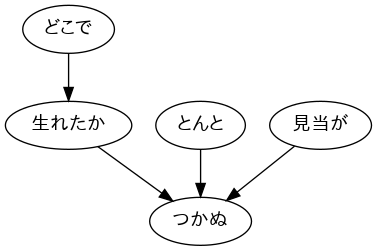

In [12]:
sentence_num = 3
graph = []
for chunk in nl[sentence_num]:
    src_string = chunk.chunk_string_without_sign()
    if chunk.dst == -1:
        dst_string = ""
    else:
        dst_string = nl[sentence_num][chunk.dst].chunk_string_without_sign()
    if src_string !="" and dst_string !="":
        graph.append((src_string, dst_string))
    
print(graph)
g=pydot.graph_from_edges(graph,directed=True)
g.write_png("44result.png")

Image.open("44result.png")

## 45. 動詞の格パターンの抽出
今回用いている文章をコーパスと見なし，日本語の述語が取りうる格を調査したい． 動詞を述語，動詞に係っている文節の助詞を格と考え，述語と格をタブ区切り形式で出力せよ． ただし，出力は以下の仕様を満たすようにせよ．

- 動詞を含む文節において，最左の動詞の基本形を述語とする
- 述語に係る助詞を格とする
- 述語に係る助詞（文節）が複数あるときは，すべての助詞をスペース区切りで辞書順に並べる

「吾輩はここで始めて人間というものを見た」という例文（neko.txt.cabochaの8文目）を考える． この文は「始める」と「見る」の２つの動詞を含み，「始める」に係る文節は「ここで」，「見る」に係る文節は「吾輩は」と「ものを」と解析された場合は，次のような出力になるはずである．

```
始める  で
見る    は を
```

このプログラムの出力をファイルに保存し，以下の事項をUNIXコマンドを用いて確認せよ．

- コーパス中で頻出する述語と格パターンの組み合わせ
- 「する」「見る」「与える」という動詞の格パターン（コーパス中で出現頻度の高い順に並べよ）

In [13]:
with open("result45.txt", "w") as out:
    for sl in nl:
        for chunk in sl:
            if len(chunk.srcs)!=0 and chunk.include_verb():
                verb=chunk.get_first_verb()
                pps=[]
                for src_chunk in chunk.srcs:
                    pp = sl[src_chunk].get_last_pparticle()
                    if pp!="" and not pp in pps:
                        pps.append(pp)
                pps.sort()
                if len(pps)!=0:
                    print(verb+"\t"+" ".join(pps), file=out)


In [14]:
!head ./result45.txt

生れる	で
つく	か が
泣く	で
する	て は
始める	で
見る	は を
聞く	で
捕える	を
煮る	て
食う	て


In [15]:
cat ./result45.txt | sort | uniq -c | sort -r 2>/dev/null | head

    712 云う	と
    452 する	を
    334 思う	と
    217 ある	が
    207 なる	に
    199 する	に
    198 見る	て
    163 する	と
    121 する	に を
    120 する	が


In [16]:
cat ./result45.txt | sort | uniq -c | sort -r | grep -E "\sする" 2>/dev/null | head

    452 する	を
    199 する	に
    163 する	と
    121 する	に を
    120 する	が
     93 する	て を
     89 する	は
     67 する	て
     62 する	が を
     60 する	も


In [17]:
cat ./result45.txt | sort | uniq -c | sort -r | grep -E "\s見る" 2>/dev/null | head

    198 見る	て
     98 見る	を
     20 見る	から
     18 見る	て は
     17 見る	と
     17 見る	て を
     16 見る	から て
     13 見る	で
      9 見る	に
      9 見る	て と


In [18]:
cat ./result45.txt | sort | uniq -c | sort -r | grep -E "\s与える" 2>/dev/null | head

      4 与える	に を
      3 与える	て に は を
      2 与える	て に を
      1 与える	も を
      1 与える	ば を
      1 与える	は も
      1 与える	で に を
      1 与える	て と は を
      1 与える	けれども は を
      1 与える	が を


## 46. 動詞の格フレーム情報の抽出
45のプログラムを改変し，述語と格パターンに続けて項（述語に係っている文節そのもの）をタブ区切り形式で出力せよ．45の仕様に加えて，以下の仕様を満たすようにせよ．

- 項は述語に係っている文節の単語列とする（末尾の助詞を取り除く必要はない）
- 述語に係る文節が複数あるときは，助詞と同一の基準・順序でスペース区切りで並べる

「吾輩はここで始めて人間というものを見た」という例文（neko.txt.cabochaの8文目）を考える． この文は「始める」と「見る」の２つの動詞を含み，「始める」に係る文節は「ここで」，「見る」に係る文節は「吾輩は」と「ものを」と解析された場合は，次のような出力になるはずである．

```
始める  で      ここで
見る    は を   吾輩は ものを
```

In [19]:
with open("result46.txt", "w") as out:
    for sl in nl:
        for chunk in sl:
            if len(chunk.srcs)!=0 and chunk.include_verb():
                verb=chunk.get_first_verb()
                pps=[]
                for src_chunk in chunk.srcs:
                    pp = sl[src_chunk].get_last_pparticle()
                    if pp!="" and not pp in pps:
                        pps.append((pp, sl[src_chunk].chunk_string_without_sign()))
                pps.sort()
                if len(pps)!=0:
                    print(verb+"\t"+" ".join([i[0] for i in pps])+"\t"+" ".join([i[1] for i in pps]), file=out)

In [20]:
!head ./result46.txt

生れる	で	どこで
つく	か が	生れたか 見当が
泣く	で	所で
する	て は	泣いて いた事だけは
始める	で	ここで
見る	は を	吾輩は ものを
聞く	で	あとで
捕える	を	我々を
煮る	て	捕えて
食う	て	煮て


## 47. 機能動詞構文のマイニング
動詞のヲ格にサ変接続名詞が入っている場合のみに着目したい．46のプログラムを以下の仕様を満たすように改変せよ．

- 「サ変接続名詞+を（助詞）」で構成される文節が動詞に係る場合のみを対象とする
- 述語は「サ変接続名詞+を+動詞の基本形」とし，文節中に複数の動詞があるときは，最左の動詞を用いる
- 述語に係る助詞（文節）が複数あるときは，すべての助詞をスペース区切りで辞書順に並べる
- 述語に係る文節が複数ある場合は，すべての項をスペース区切りで並べる（助詞の並び順と揃えよ）

例えば「別段くるにも及ばんさと、主人は手紙に返事をする。」という文から，以下の出力が得られるはずである．

```
返事をする      と に は        及ばんさと 手紙に 主人は
```

このプログラムの出力をファイルに保存し，以下の事項をUNIXコマンドを用いて確認せよ．

- コーパス中で頻出する述語（サ変接続名詞+を+動詞）
- コーパス中で頻出する述語と助詞パターン

In [21]:
with open("result47.txt", "w") as out:
    for sl in nl:
        for i,chunk in enumerate(sl):
            if chunk.dst!=-1 and sl[chunk.dst].include_verb() and len(chunk.morphs)==2 and chunk.morphs[0].pos1=="サ変接続" and chunk.morphs[1].surface=="を":
                pps=[]
                for src_chunk in chunk.srcs:
                    pp = sl[src_chunk].get_last_pparticle()
                    if pp!="" and not pp in pps:
                        pps.append((pp,sl[src_chunk].chunk_string_without_sign()))
                for src_chunk in sl[chunk.dst].srcs:
                    if src_chunk != i:
                        pp = sl[src_chunk].get_last_pparticle()
                        if pp!="" and not pp in pps:
                            pps.append((pp,sl[src_chunk].chunk_string_without_sign()))
                pps.sort()
                
                print(sl[i].chunk_string_without_sign() + sl[chunk.dst].get_first_verb(), end="", file=out)
                if len(pps)!=0:
                    print("\t"+" ".join([i[0] for i in pps])+"\t"+" ".join([i[1] for i in pps]), file=out)
                else:
                    print(file=out)

In [22]:
!head ./result47.txt

決心をする	と	こうと
返報をする	んで	偸んで
昼寝をする
昼寝をする	が	彼が
迫害を加える	て	追い廻して
話をする
投書をする	て へ	やって ほととぎすへ
話をする	に の	時に 下のような
写生をする
昼寝をする	て	出て


In [23]:
cat ./result47.txt | cut -f 1 | sort | uniq -c | sort -r 2>/dev/null | head

     29 返事をする
     21 挨拶をする
     14 話をする
     14 真似をする
     11 喧嘩をする
      8 質問をする
      7 運動をする
      6 話を聞く
      6 昼寝をする
      5 質問をかける


In [24]:
cat ./result47.txt | cut -f 1,2 | sort | uniq -c | sort -r 2>/dev/null | head

      6 運動をする
      6 真似をする
      5 返事をする	と
      4 返事をする	と は
      4 返事をする
      4 挨拶をする	と
      4 喧嘩をする
      3 質問をかける	と は
      3 挨拶をする	から
      3 喧嘩をする	と


## 48. 名詞から根へのパスの抽出
文中のすべての名詞を含む文節に対し，その文節から構文木の根に至るパスを抽出せよ． ただし，構文木上のパスは以下の仕様を満たすものとする．

- 各文節は（表層形の）形態素列で表現する
- パスの開始文節から終了文節に至るまで，各文節の表現を” -> “で連結する

「吾輩はここで始めて人間というものを見た」という文（neko.txt.cabochaの8文目）から，次のような出力が得られるはずである．

```
吾輩は -> 見た
ここで -> 始めて -> 人間という -> ものを -> 見た
人間という -> ものを -> 見た
ものを -> 見た
```

In [25]:
for sl in nl[:10]:
        for chunk in sl:
            if chunk.include_noun():
                print(chunk.chunk_string_without_sign(), end="")
                now = chunk.dst
                while now != -1:
                    print(" -> " + sl[now].chunk_string_without_sign(), end="")
                    now = sl[now].dst
                print("")
        print("")

一

吾輩は -> 猫である
猫である

名前は -> 無い

どこで -> 生れたか -> つかぬ
見当が -> つかぬ

何でも -> 薄暗い -> 所で -> 泣いて -> 記憶している
所で -> 泣いて -> 記憶している
ニャーニャー -> 泣いて -> 記憶している
いた事だけは -> 記憶している
記憶している

吾輩は -> 見た
ここで -> 始めて -> 人間という -> ものを -> 見た
人間という -> ものを -> 見た
ものを -> 見た

あとで -> 聞くと -> 種族であったそうだ
それは -> 種族であったそうだ
書生という -> 人間中で -> 種族であったそうだ
人間中で -> 種族であったそうだ
一番 -> 獰悪な -> 種族であったそうだ
獰悪な -> 種族であったそうだ
種族であったそうだ

書生というのは -> 話である
我々を -> 捕えて -> 煮て -> 食うという -> 話である
話である

当時は -> なかったから -> 思わなかった
何という -> 考も -> なかったから -> 思わなかった
考も -> なかったから -> 思わなかった

彼の -> 掌に -> 載せられて -> 持ち上げられた -> 時 -> フワフワした -> 感じが -> あったばかりである
掌に -> 載せられて -> 持ち上げられた -> 時 -> フワフワした -> 感じが -> あったばかりである
スーと -> 持ち上げられた -> 時 -> フワフワした -> 感じが -> あったばかりである
時 -> フワフワした -> 感じが -> あったばかりである
感じが -> あったばかりである



## 49. 名詞間の係り受けパスの抽出
文中のすべての名詞句のペアを結ぶ最短係り受けパスを抽出せよ．ただし，名詞句ペアの文節番号が$i$と$j(i<j)$のとき，係り受けパスは以下の仕様を満たすものとする．

- 問題48と同様に，パスは開始文節から終了文節に至るまでの各文節の表現（表層形の形態素列）を” -> “で連結して表現する
- 文節iとjに含まれる名詞句はそれぞれ，XとYに置換する

また，係り受けパスの形状は，以下の2通りが考えられる．

- 文節iから構文木の根に至る経路上に文節jが存在する場合: 文節iから文節jのパスを表示
- 上記以外で，文節iと文節jから構文木の根に至る経路上で共通の文節kで交わる場合: 文節iから文節kに至る直前のパスと文節jから文節kに至る直前までのパス，文節kの内容を” | “で連結して表示

例えば，「吾輩はここで始めて人間というものを見た。」という文（neko.txt.cabochaの8文目）から，次のような出力が得られるはずである．

```
Xは | Yで -> 始めて -> 人間という -> ものを | 見た
Xは | Yという -> ものを | 見た
Xは | Yを | 見た
Xで -> 始めて -> Y
Xで -> 始めて -> 人間という -> Y
Xという -> Y
```

In [26]:
def chunk_replace_noun(chunk, string):
    ans = []
    fl = 1
    for morph in chunk.morphs:
        if morph.pos == "記号":
            continue
        elif morph.pos =="名詞" and fl:
            ans.append(string)
            fl = 0
        elif morph.pos =="名詞":
            continue
        else:
            ans.append(morph.surface)
    return "".join(ans)

In [27]:
for sl in nl[:10]:
        path_dict = {}
        for chunk_num,chunk in enumerate(sl):
            if chunk.include_noun():
                path = [chunk_num]
                now = chunk.dst
                while now != -1:
                    path.append(now)
                    now = sl[now].dst
                path_dict[chunk_num] = path

        for srcx in path_dict:
            for srcy in path_dict:
                if srcx < srcy:
                    pathx = path_dict[srcx]
                    pathy = path_dict[srcy]
                    if srcy in pathx:
                        print(chunk_replace_noun(sl[srcx],"X"), end="")
                        now = pathx[1]
                        while now != srcy:
                            print(" -> " + sl[now].chunk_string_without_sign(), end="")
                            now = sl[now].dst
                        print(" -> Y")
                    else:
                        length = 0
                        while pathx[-length-1:] == pathy[-length-1:]:
                            length+=1
                        path_same = path_dict[srcx][-length:]
                        pathx = pathx[:len(pathx)-length]
                        pathy = pathy[:len(pathy)-length]
                        print(chunk_replace_noun(sl[srcx],"X"), end="")
                        for i in pathx[1:]:
                            print(" -> " + sl[i].chunk_string_without_sign(), end="")
                        print(" | ", end="")
                        print(chunk_replace_noun(sl[srcy],"Y"), end="")
                        for i in pathy[1:]:
                            print(" -> " + sl[i].chunk_string_without_sign(), end="")
                        print(" | ", end="")
                        print(sl[path_same[0]].chunk_string_without_sign(), end="")
                        for i in path_same[1:]:
                            print(" -> " + sl[i].chunk_string_without_sign(), end="")
                        print()
        print()


Xは -> Y


Xで -> 生れたか | Yが | つかぬ

Xでも -> 薄暗い -> Y
Xでも -> 薄暗い -> 所で | Y | 泣いて -> 記憶している
Xでも -> 薄暗い -> 所で -> 泣いて | Yだけは | 記憶している
Xでも -> 薄暗い -> 所で -> 泣いて -> Y
Xで | Y | 泣いて -> 記憶している
Xで -> 泣いて | Yだけは | 記憶している
Xで -> 泣いて -> Y
X -> 泣いて | Yだけは | 記憶している
X -> 泣いて -> Y
Xだけは -> Y

Xは | Yで -> 始めて -> 人間という -> ものを | 見た
Xは | Yという -> ものを | 見た
Xは | Yを | 見た
Xで -> 始めて -> Y
Xで -> 始めて -> 人間という -> Y
Xという -> Y

Xで -> 聞くと | Yは | 種族であったそうだ
Xで -> 聞くと | Yという -> 人間中で | 種族であったそうだ
Xで -> 聞くと | Yで | 種族であったそうだ
Xで -> 聞くと | Y -> 獰悪な | 種族であったそうだ
Xで -> 聞くと | Yな | 種族であったそうだ
Xで -> 聞くと -> Y
Xは | Yという -> 人間中で | 種族であったそうだ
Xは | Yで | 種族であったそうだ
Xは | Y -> 獰悪な | 種族であったそうだ
Xは | Yな | 種族であったそうだ
Xは -> Y
Xという -> Y
Xという -> 人間中で | Y -> 獰悪な | 種族であったそうだ
Xという -> 人間中で | Yな | 種族であったそうだ
Xという -> 人間中で -> Y
Xで | Y -> 獰悪な | 種族であったそうだ
Xで | Yな | 種族であったそうだ
Xで -> Y
X -> Y
X -> 獰悪な -> Y
Xな -> Y

Xというは | Yを -> 捕えて -> 煮て -> 食うという | 話である
Xというは -> Y
Xを -> 捕えて -> 煮て -> 食うという -> Y

Xは | Yという -> 考も | なかったから -> 思わなかった
Xは | Yも | なかったから -> 思わなかった
Xという -> Y

Xの -> 